In [29]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [36]:
import polars as pl 

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 

In [3]:
df = pl.read_csv("DATA\RA-DATA Lodwar.csv")
print(df)

shape: (4_774, 3)
┌────────┬───────┬──────┐
│ Lodwar ┆ Month ┆ Year │
│ ---    ┆ ---   ┆ ---  │
│ f64    ┆ str   ┆ i64  │
╞════════╪═══════╪══════╡
│ 0.0    ┆ Jan   ┆ 2011 │
│ 0.0    ┆ Jan   ┆ 2011 │
│ 0.0    ┆ Jan   ┆ 2011 │
│ 0.0    ┆ Jan   ┆ 2011 │
│ 0.0    ┆ Jan   ┆ 2011 │
│ …      ┆ …     ┆ …    │
│ 12.4   ┆ Nov   ┆ 2024 │
│ 0.5    ┆ Nov   ┆ 2024 │
│ 0.9    ┆ Nov   ┆ 2024 │
│ 0.0    ┆ Nov   ┆ 2024 │
│ null   ┆ Nov   ┆ 2024 │
└────────┴───────┴──────┘


<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\USER\AppData\Local\Temp\ipykernel_8720\1247277615.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pl.read_csv("DATA\RA-DATA Lodwar.csv")


In [6]:
df.drop_nulls()

Lodwar,Month,Year
f64,str,i64
0.0,"""Jan""",2011
0.0,"""Jan""",2011
0.0,"""Jan""",2011
0.0,"""Jan""",2011
0.0,"""Jan""",2011
…,…,…
33.6,"""Nov""",2024
12.4,"""Nov""",2024
0.5,"""Nov""",2024


In [9]:
# Map month strings to numbers
month_map = {
    "Jan": 1, "Feb": 2, "Mar": 3,
    "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9,
    "Oct": 10, "Nov": 11, "Dec": 12
}

In [14]:
df = df.with_columns([
    pl.col("Month").replace(month_map).cast(pl.Int8).alias("month")
])
df


Lodwar,Month,Year,month
f64,str,i64,i8
0.0,"""Jan""",2011,1
0.0,"""Jan""",2011,1
0.0,"""Jan""",2011,1
0.0,"""Jan""",2011,1
0.0,"""Jan""",2011,1
…,…,…,…
12.4,"""Nov""",2024,11
0.5,"""Nov""",2024,11
0.9,"""Nov""",2024,11


In [15]:
# Filter for MAM and OND
mam_df = df.filter(pl.col("month").is_in([3, 4, 5]))
ond_df = df.filter(pl.col("month").is_in([10, 11, 12]))


In [33]:
# For MAM: filter values > 0 before grouping
mam_seasonal = mam_df.filter(pl.col("Lodwar") > 0).group_by("Year").agg(
    pl.col("Lodwar").mean().alias("MAM_mean")
)

# For OND: filter values > 0 before grouping
ond_seasonal = ond_df.filter(pl.col("Lodwar") > 0).group_by("Year").agg(
    pl.col("Lodwar").mean().alias("OND_mean")
)


In [21]:
!pip install pandas
import pandas

In [48]:
# Join the two on Year
combined = mam_seasonal.join(ond_seasonal, on="Year", how="outer").sort("Year")
combined_pd=combined

C:\Users\USER\AppData\Local\Temp\ipykernel_8720\1714792736.py:2: DeprecationWarning:

Use of `how='outer'` should be replaced with `how='full'`.



In [25]:
!pip install pyarrow


  Using cached pyarrow-20.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.7 MB ? eta -:--:--
    --------------------------------------- 0.5/25.7 MB 250.2 kB/s eta 0:01:41
   - -------------------------------------- 0.8/25.7 MB 420.6 kB/s eta 0:01:00
   - -------------------------------------- 0.8/25.7 MB 420.6 kB/s eta 0:01:00
   - -------------------------------------- 1.0/25.7 MB 467.6 kB/s eta 0:00:53
   - -------------------------------------- 1.0/25.7 MB 467.6 kB/s eta 0:00:53
   -- -----------------------------------

In [38]:
!pip install nbformat --upgrade



   ----- ---------------------------------- 1/7 [rpds-py]
   ----------- ---------------------------- 2/7 [attrs]
   ----------------- ---------------------- 3/7 [referencing]
   ---------------------- ----------------- 4/7 [jsonschema-specifications]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------------- ----- 6/7 [nbformat]
   ---------------------------------- ----- 6/7 [nbformat]
   ---------------------------------- ----- 6/7 [nbformat]
   ---------------------------------------- 7/7 [nbformat]



In [41]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # Ensures proper rendering in Jupyter Notebook


In [46]:
import matplotlib.pyplot as plt

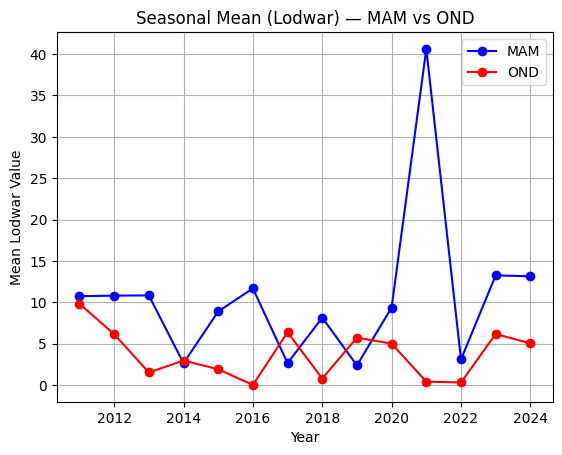

In [49]:
# Plot the MAM and OND lines
plt.plot(combined_pd["Year"], combined_pd["MAM_mean"], label="MAM", marker="o", linestyle='-', color='b')
plt.plot(combined_pd["Year"], combined_pd["OND_mean"], label="OND", marker="o", linestyle='-', color='r')

# Adding labels and title
plt.title("Seasonal Mean (Lodwar) — MAM vs OND")
plt.xlabel("Year")
plt.ylabel("Mean Lodwar Value")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [50]:
import matplotlib.pyplot as plt
import numpy as np

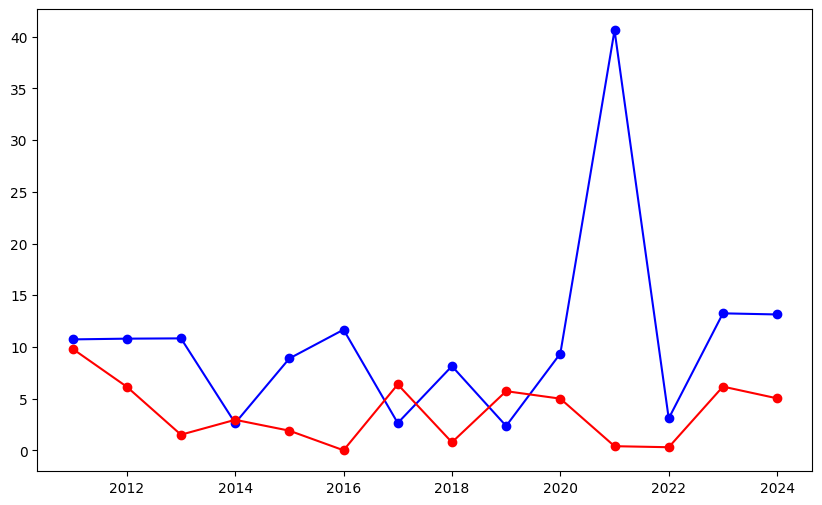

In [51]:
# Plot original MAM and OND lines
plt.figure(figsize=(10, 6))
plt.plot(combined_pd["Year"], combined_pd["MAM_mean"], label="MAM", marker="o", linestyle='-', color='b')
plt.plot(combined_pd["Year"], combined_pd["OND_mean"], label="OND", marker="o", linestyle='-', color='r')


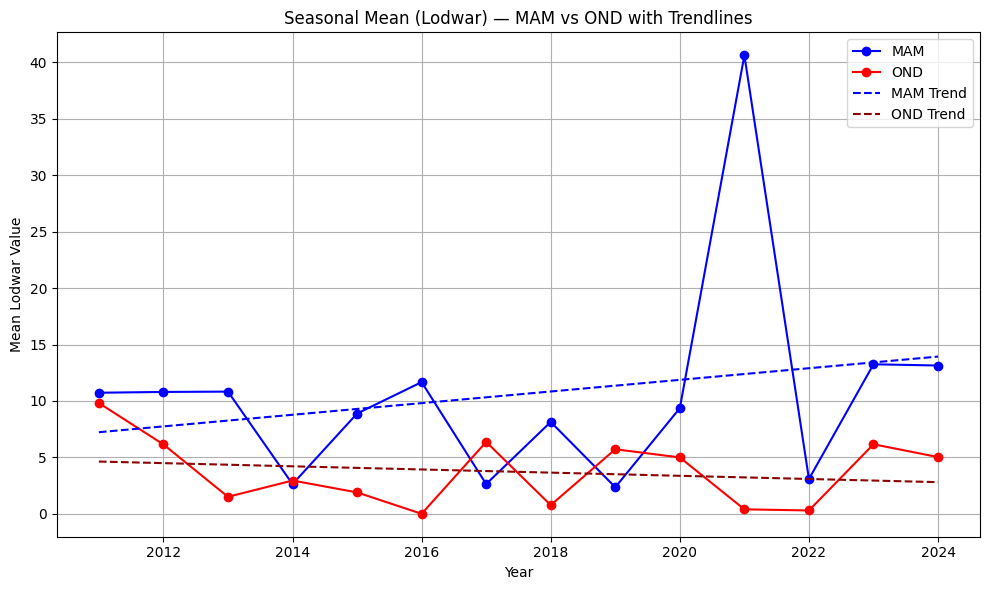

In [54]:
# Plot original MAM and OND lines
plt.figure(figsize=(10, 6))
plt.plot(combined_pd["Year"], combined_pd["MAM_mean"], label="MAM", marker="o", linestyle='-', color='b')
plt.plot(combined_pd["Year"], combined_pd["OND_mean"], label="OND", marker="o", linestyle='-', color='r')

# Get x and y data for trendlines
x = combined_pd["Year"]
y_mam = combined_pd["MAM_mean"]
y_ond = combined_pd["OND_mean"]

# Calculate trendlines (1st degree polynomial = linear)
mam_fit = np.polyfit(x, y_mam, 1)
ond_fit = np.polyfit(x, y_ond, 1)

# Generate predicted y values from the fit
mam_trend = np.polyval(mam_fit, x)
ond_trend = np.polyval(ond_fit, x)

# Plot trendlines
plt.plot(x, mam_trend, label="MAM Trend", linestyle='--', color='blue')
plt.plot(x, ond_trend, label="OND Trend", linestyle='--', color='darkred')

# Labels and formatting
plt.title("Seasonal Mean (Lodwar) — MAM vs OND with Trendlines")
plt.xlabel("Year")
plt.ylabel("Mean Lodwar Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
!pip install polars matplotlib cartopy



In [58]:
pip install folium



   -------- ------------------------------- 1/5 [MarkupSafe]
   ---------------- ----------------------- 2/5 [jinja2]
   ---------------- ----------------------- 2/5 [jinja2]
   ---------------- ----------------------- 2/5 [jinja2]
   ---------------- ----------------------- 2/5 [jinja2]
   ------------------------ --------------- 3/5 [branca]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   -------------------------------- ------- 4/5 [folium]
   ---------------------------------------- 5/5 [folium]

Note: you may need to restart the kernel to use updated packages.


In [60]:
df = pl.read_csv("DATA\DK11rf- Map.csv")
print(df)

shape: (38, 4)
┌──────────┬──────────┬──────────┬─────────┐
│ STATION  ┆ LATITUDE ┆ LONGTUDE ┆ Dk11 rf │
│ ---      ┆ ---      ┆ ---      ┆ ---     │
│ str      ┆ f64      ┆ f64      ┆ f64     │
╞══════════╪══════════╪══════════╪═════════╡
│ Kakamega ┆ 0.28     ┆ 34.75    ┆ 115.8   │
│ Kisii    ┆ -0.68    ┆ 34.8     ┆ 125.6   │
│ Kisumu   ┆ -0.1     ┆ 34.75    ┆ 116.1   │
│ lodwar   ┆ 3.12     ┆ 35.62    ┆ 52.4    │
│ Kitale   ┆ 1.0      ┆ 35.0     ┆ 69.4    │
│ …        ┆ …        ┆ …        ┆ …       │
│ MAB      ┆ -1.27    ┆ 36.87    ┆ 133.6   │
│ Kangema  ┆ -0.68    ┆ 36.96    ┆ 230.6   │
│ Laikipia ┆ 0.05     ┆ 37.03    ┆ 58.9    │
│ Kitui    ┆ -1.38    ┆ 38.0     ┆ 46.3    │
│ Matungu  ┆ 0.4      ┆ 34.47    ┆ 132.12  │
└──────────┴──────────┴──────────┴─────────┘


<>:1: SyntaxWarning:

invalid escape sequence '\D'

<>:1: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\USER\AppData\Local\Temp\ipykernel_8720\1704545285.py:1: SyntaxWarning:

invalid escape sequence '\D'



In [61]:
pip install pandas matplotlib cartopy

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [72]:
import polars as pl

df = pl.read_csv("DATA\DK11rf- Map.csv")
print(df)

shape: (38, 4)
┌──────────┬──────────┬──────────┬─────────┐
│ STATION  ┆ LATITUDE ┆ LONGTUDE ┆ Dk11 rf │
│ ---      ┆ ---      ┆ ---      ┆ ---     │
│ str      ┆ f64      ┆ f64      ┆ f64     │
╞══════════╪══════════╪══════════╪═════════╡
│ Kakamega ┆ 0.28     ┆ 34.75    ┆ 115.8   │
│ Kisii    ┆ -0.68    ┆ 34.8     ┆ 125.6   │
│ Kisumu   ┆ -0.1     ┆ 34.75    ┆ 116.1   │
│ lodwar   ┆ 3.12     ┆ 35.62    ┆ 52.4    │
│ Kitale   ┆ 1.0      ┆ 35.0     ┆ 69.4    │
│ …        ┆ …        ┆ …        ┆ …       │
│ MAB      ┆ -1.27    ┆ 36.87    ┆ 133.6   │
│ Kangema  ┆ -0.68    ┆ 36.96    ┆ 230.6   │
│ Laikipia ┆ 0.05     ┆ 37.03    ┆ 58.9    │
│ Kitui    ┆ -1.38    ┆ 38.0     ┆ 46.3    │
│ Matungu  ┆ 0.4      ┆ 34.47    ┆ 132.12  │
└──────────┴──────────┴──────────┴─────────┘


<>:3: SyntaxWarning:

invalid escape sequence '\D'

<>:3: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\USER\AppData\Local\Temp\ipykernel_8720\2138455558.py:3: SyntaxWarning:

invalid escape sequence '\D'



In [66]:
import polars as pl
from io import StringIO
data = """
STATION,LATITUDE,LONGITUDE,RAINFALL
Kakamega,0.28,34.75,115.8
Kisii,-0.68,34.8,125.6
Kisumu,-0.1,34.75,116.1
Lodwar,3.12,35.62,52.4
Kitale,1,35,69.4
Eldoret,0.52,35.28,151
Nakuru,-0.27,36.07,68.6
Kericho,-0.37,35.35,184.9
Narok,-1.13,35.83,79.11
Nyeri,-0.5,37,96.4
Thika,-1.02,37.1,58.61
Dagoretti,-1.3,36.75,78.21
Marsabit,2.32,37.98,179.01
Meru,0.08,37.65,187.5
Embu,-0.5,37.45,167.11
Katumani,-1.58,37.23,32.9
Makindu,-2.28,37.83,24.9
Moyale,3.53,39.05,127.2
Mandera,3.95,41.87,27.8
Wajir,1.75,40.07,10.2
Garissa,-0.48,39.63,50.92
Lamu,-2.27,40.9,8.01
Malindi,-3.23,40.1,39.4
Mombasa,-4.03,39.62,34.3
Voi,-3.4,38.57,24.9
Msabaha,-3.27,40.1,20.5
Mtwapa,-3.93,39.73,9.7
Kabete,-1.25,36.73,99.1
Nyahururu,0.03,36.35,164.8
JKIA,-1.32,36.92,18
Wilson,-1.32,36.82,49.9
EldoretAp,0.4,35.23,110.01
Suba,-0.42,34.13,160.5
MAB,-1.27,36.87,133.6
Kangema,-0.68,36.96,230.6
Laikipia,0.05,37.03,58.9
Kitui,-1.38,38,46.3
Matungu,0.4,34.47,132.12
"""
df = pl.read_csv(StringIO(data))
print(df)



shape: (38, 4)
┌──────────┬──────────┬───────────┬──────────┐
│ STATION  ┆ LATITUDE ┆ LONGITUDE ┆ RAINFALL │
│ ---      ┆ ---      ┆ ---       ┆ ---      │
│ str      ┆ f64      ┆ f64       ┆ f64      │
╞══════════╪══════════╪═══════════╪══════════╡
│ Kakamega ┆ 0.28     ┆ 34.75     ┆ 115.8    │
│ Kisii    ┆ -0.68    ┆ 34.8      ┆ 125.6    │
│ Kisumu   ┆ -0.1     ┆ 34.75     ┆ 116.1    │
│ Lodwar   ┆ 3.12     ┆ 35.62     ┆ 52.4     │
│ Kitale   ┆ 1.0      ┆ 35.0      ┆ 69.4     │
│ …        ┆ …        ┆ …         ┆ …        │
│ MAB      ┆ -1.27    ┆ 36.87     ┆ 133.6    │
│ Kangema  ┆ -0.68    ┆ 36.96     ┆ 230.6    │
│ Laikipia ┆ 0.05     ┆ 37.03     ┆ 58.9     │
│ Kitui    ┆ -1.38    ┆ 38.0      ┆ 46.3     │
│ Matungu  ┆ 0.4      ┆ 34.47     ┆ 132.12   │
└──────────┴──────────┴───────────┴──────────┘


In [75]:
df_pl = pl.read_csv(StringIO(data))
print(df_pl)


shape: (38, 4)
┌──────────┬──────────┬───────────┬──────────┐
│ STATION  ┆ LATITUDE ┆ LONGITUDE ┆ RAINFALL │
│ ---      ┆ ---      ┆ ---       ┆ ---      │
│ str      ┆ f64      ┆ f64       ┆ f64      │
╞══════════╪══════════╪═══════════╪══════════╡
│ Kakamega ┆ 0.28     ┆ 34.75     ┆ 115.8    │
│ Kisii    ┆ -0.68    ┆ 34.8      ┆ 125.6    │
│ Kisumu   ┆ -0.1     ┆ 34.75     ┆ 116.1    │
│ Lodwar   ┆ 3.12     ┆ 35.62     ┆ 52.4     │
│ Kitale   ┆ 1.0      ┆ 35.0      ┆ 69.4     │
│ …        ┆ …        ┆ …         ┆ …        │
│ MAB      ┆ -1.27    ┆ 36.87     ┆ 133.6    │
│ Kangema  ┆ -0.68    ┆ 36.96     ┆ 230.6    │
│ Laikipia ┆ 0.05     ┆ 37.03     ┆ 58.9     │
│ Kitui    ┆ -1.38    ┆ 38.0      ┆ 46.3     │
│ Matungu  ┆ 0.4      ┆ 34.47     ┆ 132.12   │
└──────────┴──────────┴───────────┴──────────┘


In [86]:
df

STATION,LATITUDE,LONGITUDE,RAINFALL
str,f64,f64,f64
"""Kakamega""",0.28,34.75,115.8
"""Kisii""",-0.68,34.8,125.6
"""Kisumu""",-0.1,34.75,116.1
"""Lodwar""",3.12,35.62,52.4
"""Kitale""",1.0,35.0,69.4
…,…,…,…
"""MAB""",-1.27,36.87,133.6
"""Kangema""",-0.68,36.96,230.6
"""Laikipia""",0.05,37.03,58.9


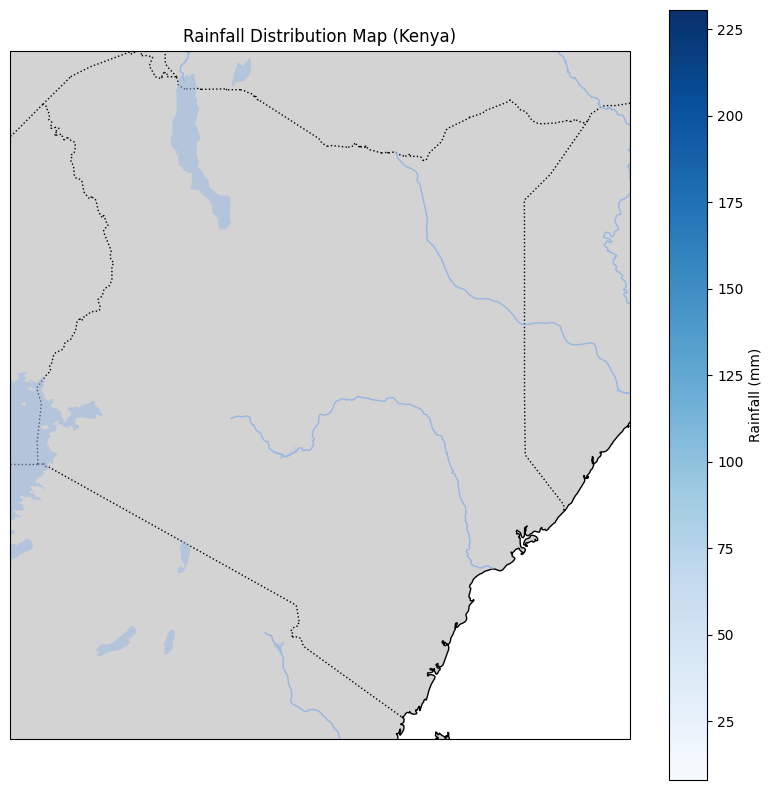

In [87]:
# Plotting
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features
ax.set_extent([33.5, 42.5, -5, 5])  # Zoom to Kenya
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Scatter plot with rainfall as color
sc = ax.scatter(df["LATITUDE"], df["LONGITUDE"],
                c=df["RAINFALL"], cmap='Blues', s=80,
                edgecolor='black')

# Add colorbar and title
plt.colorbar(sc, label="Rainfall (mm)")
plt.title("Rainfall Distribution Map (Kenya)")

plt.show()

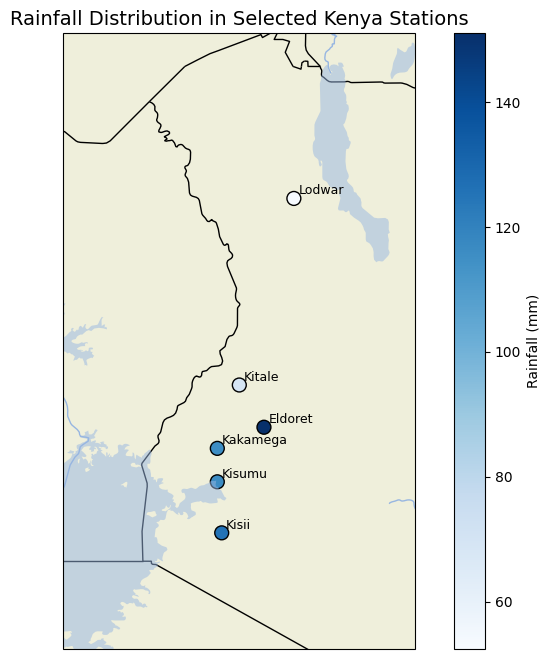

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Sample data
stations = ["Kakamega", "Kisii", "Kisumu", "Lodwar", "Kitale", "Eldoret"]
latitudes = [0.28, -0.68, -0.1, 3.12, 1.0, 0.52]
longitudes = [34.75, 34.8, 34.75, 35.62, 35.0, 35.28]
rainfall = [115.8, 125.6, 116.1, 52.4, 69.4, 151.0]

# Set up the map
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([33, 37, -2, 5])  # Long min, Long max, Lat min, Lat max

# Add features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, alpha=0.5)

# Scatter plot with rainfall as color
sc = ax.scatter(longitudes, latitudes, c=rainfall, cmap='Blues', s=100,
                edgecolor='black', transform=ccrs.PlateCarree())

# Add station labels
for station, lon, lat in zip(stations, longitudes, latitudes):
    ax.text(lon + 0.05, lat + 0.05, station, fontsize=9,
            transform=ccrs.PlateCarree())

# Add colorbar and title
plt.colorbar(sc, ax=ax, label="Rainfall (mm)")
plt.title("Rainfall Distribution in Selected Kenya Stations", fontsize=14)

plt.show()


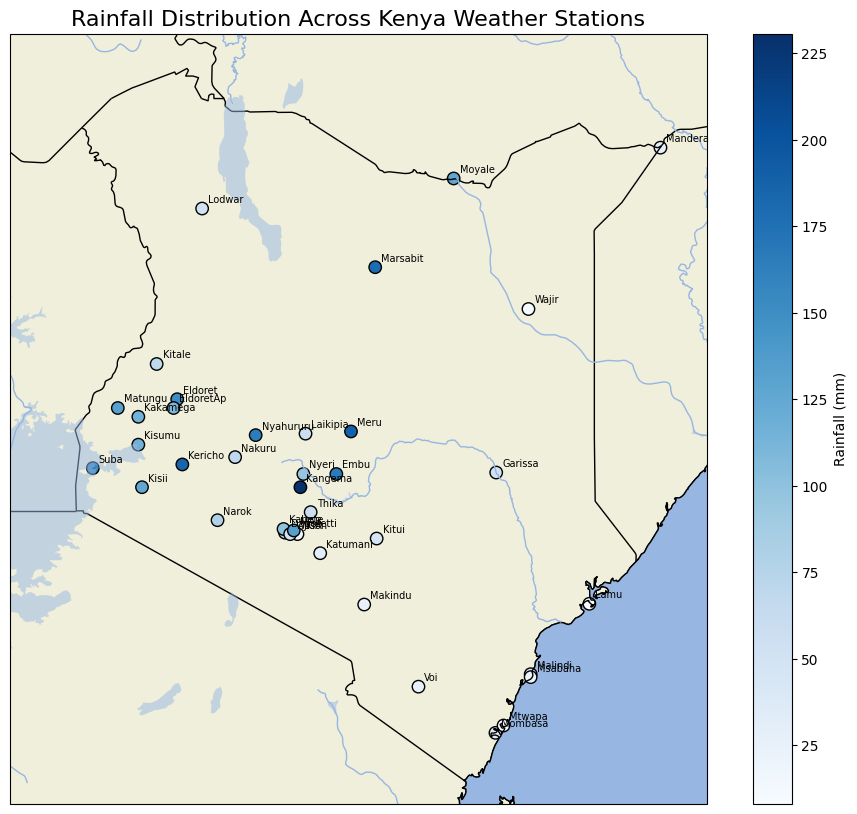

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Full dataset
stations = [
    "Kakamega","Kisii","Kisumu","Lodwar","Kitale","Eldoret","Nakuru","Kericho",
    "Narok","Nyeri","Thika","Dagoretti","Marsabit","Meru","Embu","Katumani",
    "Makindu","Moyale","Mandera","Wajir","Garissa","Lamu","Malindi","Mombasa",
    "Voi","Msabaha","Mtwapa","Kabete","Nyahururu","JKIA","Wilson","EldoretAp",
    "Suba","MAB","Kangema","Laikipia","Kitui","Matungu"
]

latitudes = [
    0.28,-0.68,-0.1,3.12,1,0.52,-0.27,-0.37,
    -1.13,-0.5,-1.02,-1.3,2.32,0.08,-0.5,-1.58,
    -2.28,3.53,3.95,1.75,-0.48,-2.27,-3.23,-4.03,
    -3.4,-3.27,-3.93,-1.25,0.03,-1.32,-1.32,0.4,
    -0.42,-1.27,-0.68,0.05,-1.38,0.4
]

longitudes = [
    34.75,34.8,34.75,35.62,35,35.28,36.07,35.35,
    35.83,37,37.1,36.75,37.98,37.65,37.45,37.23,
    37.83,39.05,41.87,40.07,39.63,40.9,40.1,39.62,
    38.57,40.1,39.73,36.73,36.35,36.92,36.82,35.23,
    34.13,36.87,36.96,37.03,38,34.47
]

rainfall = [
    115.8,125.6,116.1,52.4,69.4,151,68.6,184.9,
    79.11,96.4,58.61,78.21,179.01,187.5,167.11,32.9,
    24.9,127.2,27.8,10.2,50.92,8.01,39.4,34.3,
    24.9,20.5,9.7,99.1,164.8,18,49.9,110.01,
    160.5,133.6,230.6,58.9,46.3,132.12
]

# Set up the map
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([33, 42.5, -5, 5.5])  # Covers all of Kenya

# Add map features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.OCEAN)

# Scatter plot of rainfall
sc = ax.scatter(longitudes, latitudes, c=rainfall, cmap='Blues', s=80,
                edgecolor='black', transform=ccrs.PlateCarree())

# Add station labels
for station, lon, lat in zip(stations, longitudes, latitudes):
    ax.text(lon + 0.08, lat + 0.08, station, fontsize=7,
            transform=ccrs.PlateCarree())

# Colorbar and title
plt.colorbar(sc, label="Rainfall (mm)")
plt.title("Rainfall Distribution Across Kenya Weather Stations", fontsize=16)

plt.show()


In [5]:
pip install scipy

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
    --------------------------------------- 0.8/41.0 MB 4.0 MB/s eta 0:00:11
   - -------------------------------------- 1.8/41.0 MB 4.9 MB/s eta 0:00:09
   --- ------------------------------------ 3.1/41.0 MB 4.6 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/41.0 MB 4.3 MB/s eta 0:00:09
   ---- ----------------------------------- 4.5/41.0 MB 4.0 MB/s eta 0:00:10
   ----- ---------------------------------- 5.2/41.0 MB 4.0 MB/s eta 0:00:10
   ----- ---------------------------------- 6.0/41.0 MB 3.9 MB/s eta 0:00:09
   ------ --------------------------------- 6.6/41.0 MB 3.9 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/41.0 MB 3.8 MB/s eta 0:00:09
   ------- -------------------------------- 8.1/41.0 MB 3.8 MB/s eta 0:00:09
   -------- ------------------------------- 9.2/41.0 MB 3.8 MB/s eta 0:00:09
   --------- 

In [5]:
pip geopandas

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "geopandas"



In [7]:
pip install geopandas


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 3.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.6/16.2 MB 2.7 MB/s eta 0:00:06
   ----- ---------------------------------- 2.1/16.2 MB 2.5 MB/s eta 0:00:06
   ----- ---------------------------------- 2.4/16.2 MB 2.4 MB/s eta 0:00:06
   ------ --------------------------------- 2.6/16.2 MB 2.2 MB/s eta 0:00:07
   ------- -------------------------------- 2.9/16.2 MB 2.1 MB/s eta 0:00:07
   ------- -------------------------------- 3.1/16.2 MB 2.0 MB/s eta 0:00:07
   -------- ------------------------------- 3.4/16.2 MB 1.8 MB/s eta 0:00:08
   -------- ------------------------------- 3.4/16.2 MB 1.8 MB/s eta 0:00:08
   --------- ------------------------------ 3.7/16.2 MB 1.6 MB/s eta 0:00:08
   --------- ------------------------------ 3.9/16.2 MB 1.6 MB/s eta 0:00:08
   ----------